## Import necessary data and library

In [1]:
#Import necessary data
    
#For data analysis
import pandas as pd
import numpy as np

#For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
 
#Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Classifier library
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install xgboost

### Loading the dataset 

In [3]:
#load data set
data = pd.read_csv(r"C:\Users\user\Downloads\Machine Learning\CAPSTONE PROJECT\diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data Expoloaration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Checking for missing values

In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Checking for duplicate

In [7]:
data.duplicated().sum()

3854

### Removing duplicate

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

<Axes: >

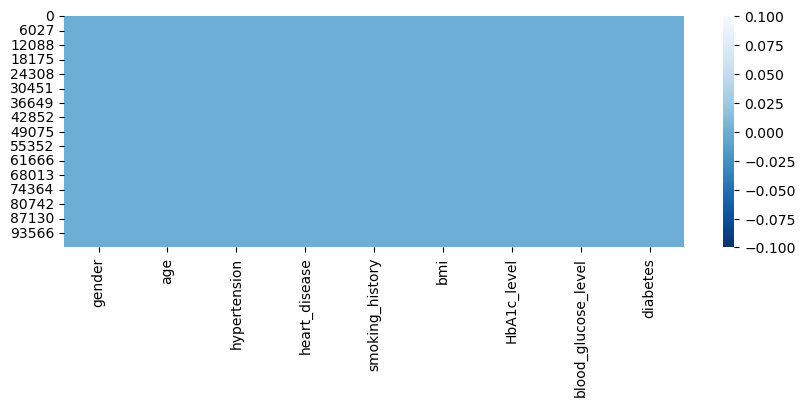

In [10]:
#Visualizing the missing values
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

In [11]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### Encoding categorical variables

In [12]:
categorical_data = data.select_dtypes(include=['object', 'category'])

In [13]:
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


### EDA - Univariate Analysis

In [14]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='bmi'>

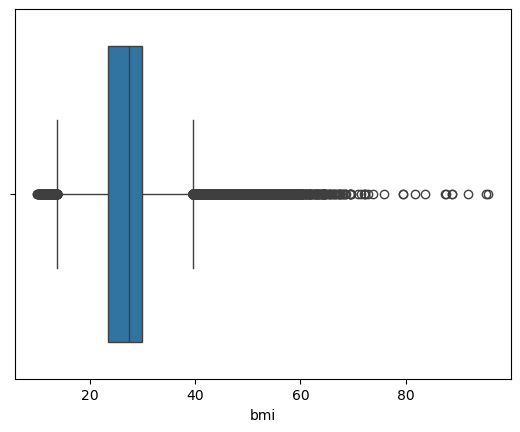

In [15]:
#checking for outliers
sns.boxplot(x=data["bmi"])

<Axes: xlabel='HbA1c_level'>

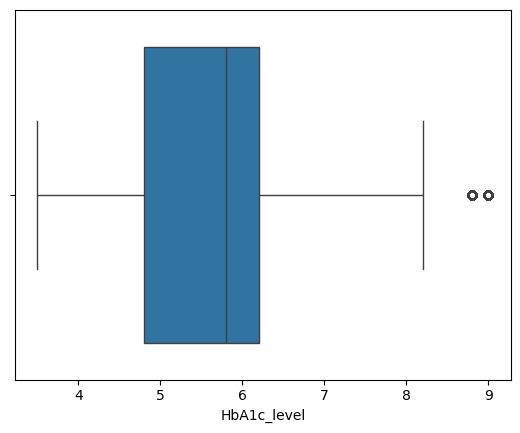

In [16]:
#checking for outliers
sns.boxplot(x=data["HbA1c_level"])

<Axes: xlabel='blood_glucose_level'>

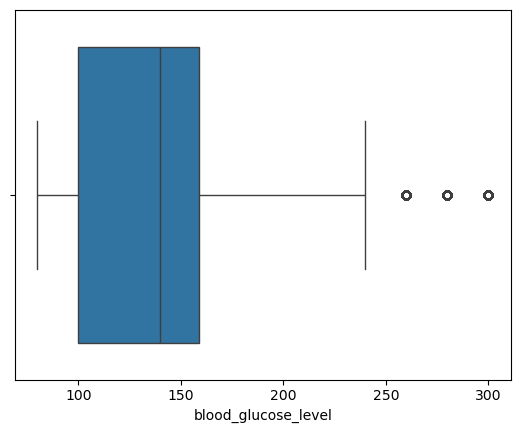

In [17]:
#checking for outliers
sns.boxplot(x=data["blood_glucose_level"])

In [18]:
encoder = LabelEncoder()

In [19]:
LabelEncoder()

LabelEncoder()

In [20]:
categorical_data.head(5)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [21]:
encoder.fit(data["gender"])

LabelEncoder()

In [22]:
encoder.transform(data["gender"])[:10:]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [23]:
data["gender"].head(5)

0    Female
1    Female
2      Male
3    Female
4      Male
Name: gender, dtype: object

In [24]:
encoder.fit_transform(data["smoking_history"])[:50:]

array([4, 0, 4, 1, 1, 4, 4, 0, 4, 4, 4, 3, 3, 4, 0, 0, 4, 4, 0, 2, 1, 0,
       4, 3, 0, 4, 5, 3, 4, 4, 0, 0, 1, 4, 4, 0, 0, 4, 1, 4, 3, 0, 4, 0,
       0, 4, 4, 4, 4, 0])

In [25]:
data["smoking_history"].head(5)

0      never
1    No Info
2      never
3    current
4    current
Name: smoking_history, dtype: object

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [27]:
categorical_data.head(3)

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never


In [28]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [29]:
# Make sure 'features' is defined first
features = data.drop("diabetes", axis=1)

# Then encode
encoder = LabelEncoder()
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(data[column_name])

<Axes: xlabel='diabetes', ylabel='count'>

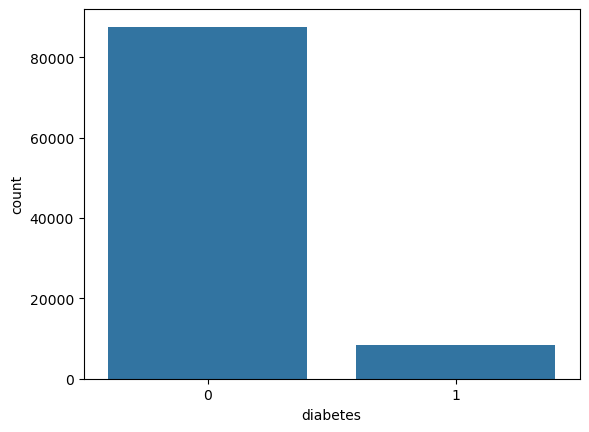

In [30]:
sns.countplot(x=data["diabetes"])

Text(0.5, 1.0, 'Total Number of Patients')

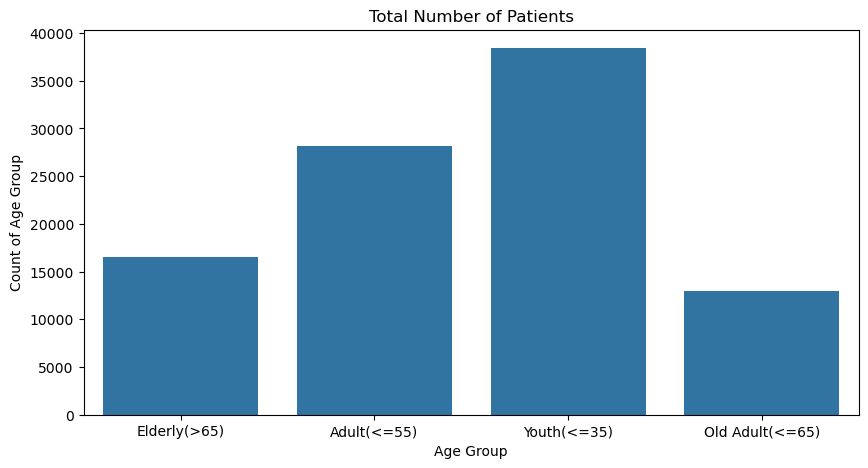

In [31]:
# Data visualisation for age bracket

def age_bracket(age):
    if age <=35:
        return "Youth(<=35)"
    elif age <=55:
        return "Adult(<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
data['age_bracket'] = data['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=data)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

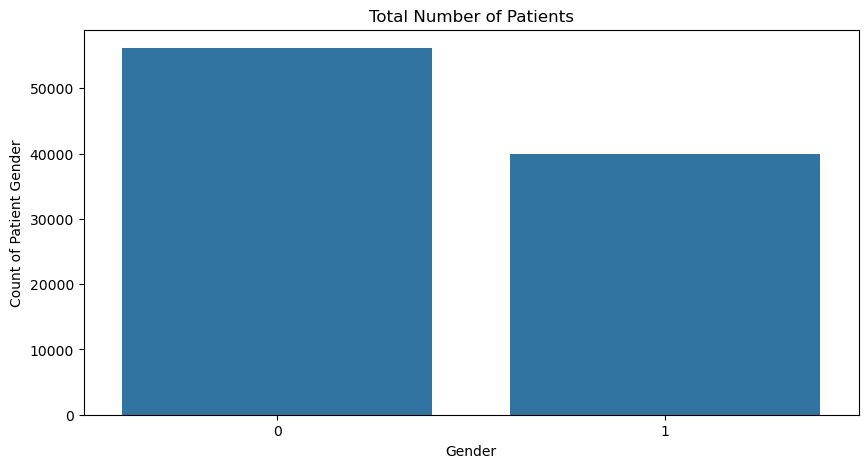

In [32]:
# Data visualisation for gender
def sex(gender):
    if gender =="Male":
        return "1"
    else:
        return "0"
data['sex'] = data['gender'].apply(sex)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='sex', data=data)
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

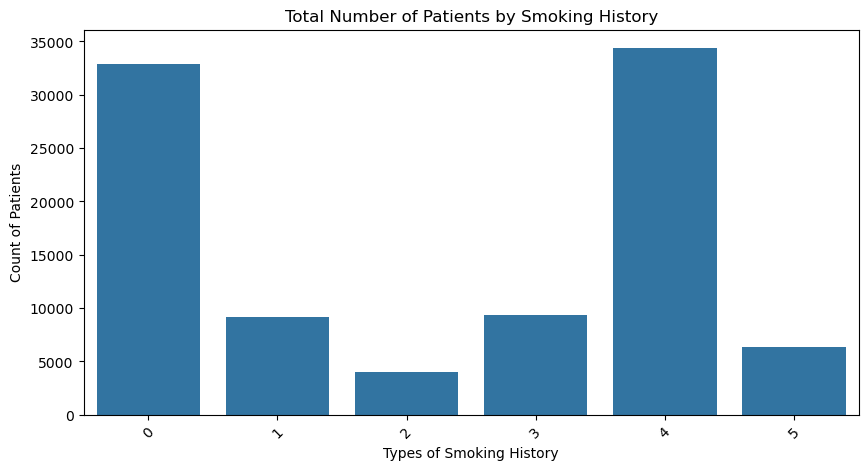

In [33]:
# Data visualisation for smoking_history
def smoking_hist(smh):
    if smh.lower() == 'no info':
        return "0"
    elif smh.lower() == 'current':
        return "1"
    elif smh.lower() == 'ever':
        return "2"
    elif smh.lower() == 'former':
        return "3"
    elif smh.lower() == 'never':
        return "4"
    else:
        return "5"

data['smoking_history_cat'] = data['smoking_history'].apply(smoking_hist)

# Plotting
plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_history_cat', data=data, order=sorted(data['smoking_history_cat'].unique()))
plt.xlabel('Types of Smoking History')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients by Smoking History')
plt.xticks(rotation=45)
plt.show()

label
No     87664
Yes     8482
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

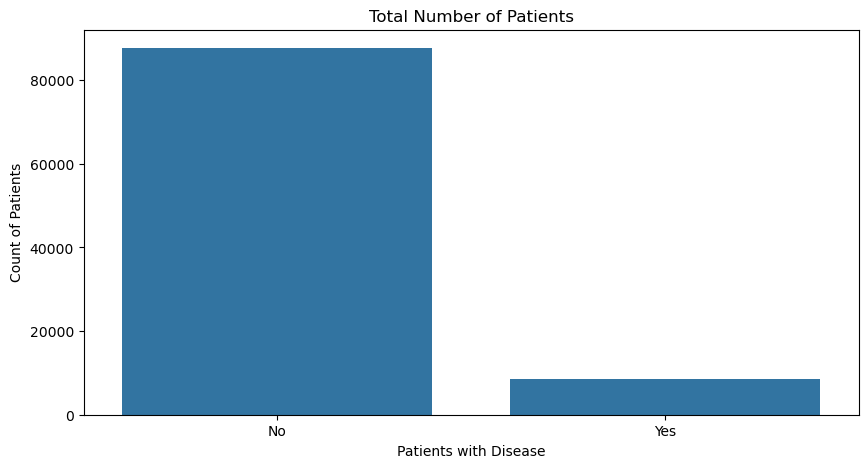

In [34]:
# Data visualisation for chest pain type
# Target - having disease or not (1:yes, 0:no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
data['label'] = data['diabetes'].apply(label)

# Total patient in each category
print(data['label'].value_counts())

#Investigating the gender of patient

plt.figure(figsize = (10, 5))
sns.countplot(x='label', data=data)
plt.xlabel('Patients with Disease')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients')

In [35]:
data.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,sex,smoking_history_cat,label
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65),0,4,No
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=55),0,0,No
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth(<=35),1,4,No


In [36]:
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(data[column_name])

In [37]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


### EDA - Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

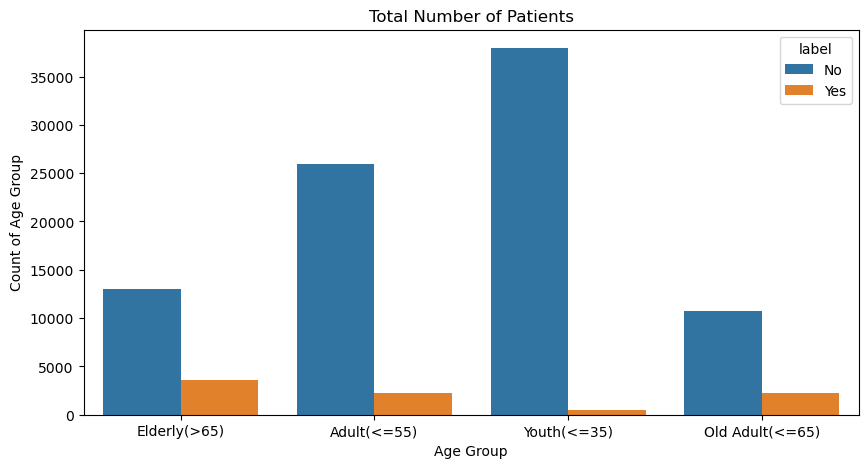

In [38]:
#Investigating the age group of patients by the target features

plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

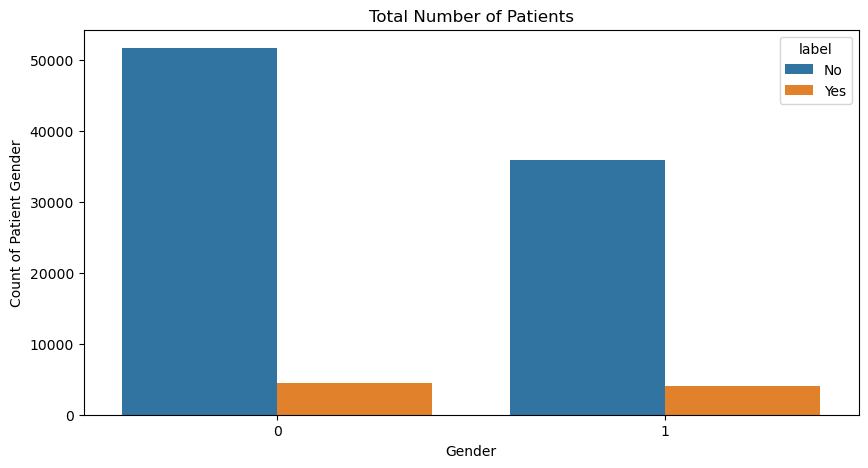

In [39]:
# Investigating the gender of patients by the target features

plt.figure(figsize = (10, 5))
sns.countplot(x='sex', data=data, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')

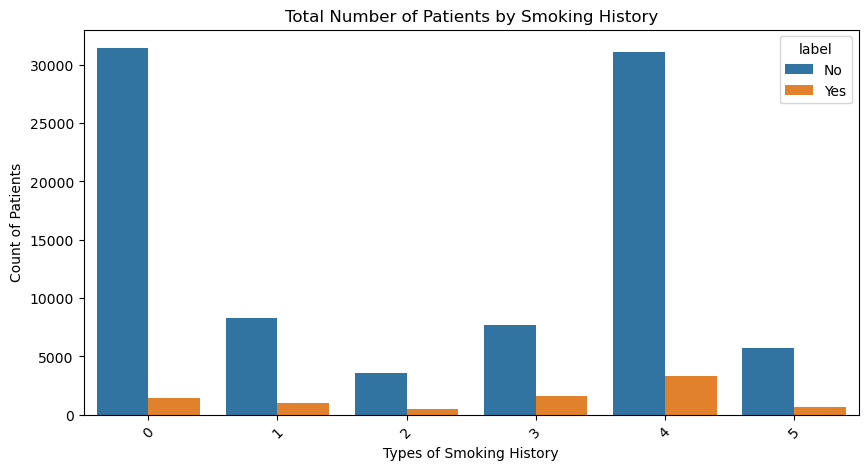

In [40]:
# Investigating the gender of patients by the target features

plt.figure(figsize=(10, 5))
sns.countplot(x='smoking_history_cat', data=data, hue='label', order=sorted(data['smoking_history_cat'].unique()))
plt.xlabel('Types of Smoking History')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients by Smoking History')
plt.xticks(rotation=45)
plt.show()

### EDA - Multivariate Analysis

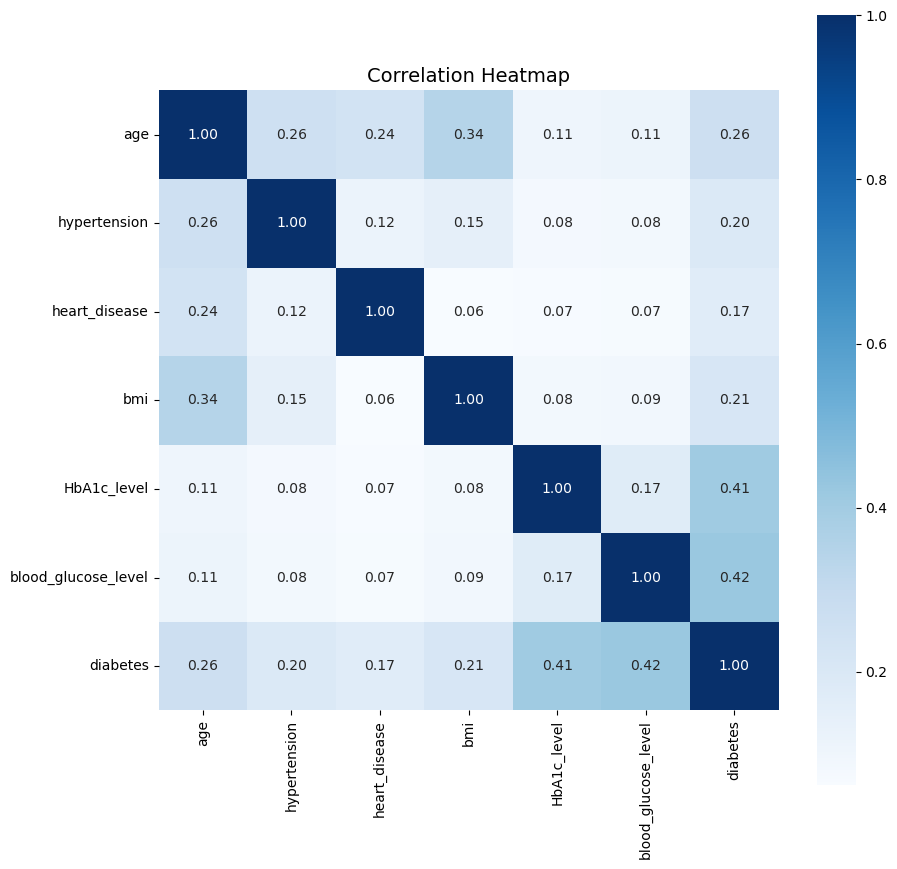

In [41]:
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize =(10, 10))

hm = sns.heatmap(numeric_data.corr(), cmap='Blues',cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Feature Engineering / Data Pre-Processing

In [42]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,sex,smoking_history_cat,label
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65),0,4,No
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=55),0,0,No
2,Male,28.0,0,0,never,27.32,5.7,158,0,Youth(<=35),1,4,No
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult(<=55),0,1,No
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly(>65),1,1,No


In [43]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [44]:
## create a copy of data (Exclude other columns that were created)

data1 = data[['sex', 'age', 'hypertension', 'heart_disease', 'smoking_history_cat',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]
label = data[['diabetes']]

In [45]:
data1.dtypes

sex                     object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history_cat     object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [46]:
data1.head()

,sex,age,hypertension,heart_disease,smoking_history_cat,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [47]:
label.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [48]:
# dealing with outliers
# Normalize the data
scaler = MinMaxScaler()

data1["Scaled_BMI"] = scaler.fit_transform(data1[['bmi']].values.reshape(-1, 1))
data1["Scaled_HbA1c"] = scaler.fit_transform(data1[['HbA1c_level']].values.reshape(-1, 1))
data1["Scaled_BGL"] = scaler.fit_transform(data1[['blood_glucose_level']].values.reshape(-1, 1))

data1.drop(['bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1, inplace=True)

data1.head()

,sex,age,hypertension,heart_disease,smoking_history_cat,diabetes,Scaled_BMI,Scaled_HbA1c,Scaled_BGL
0,0,80.0,0,1,4,0,0.177171,0.563636,0.272727
1,0,54.0,0,0,0,0,0.202031,0.563636,0.000000
2,1,28.0,0,0,4,0,0.202031,0.400000,0.354545
3,0,36.0,0,0,1,0,0.156863,0.272727,0.340909
4,1,76.0,1,1,1,0,0.118231,0.236364,0.340909


In [49]:
## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [50]:
# Initialize the model
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)

In [51]:
y_test.head(3)

,diabetes
2547,0
34774,0
71084,1


In [52]:
X_test.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
2547,0,5.0,0,0,0,15.14,4.5,90
34774,1,19.0,0,0,4,22.74,6.6,85
71084,0,52.0,0,0,4,24.27,7.5,220
50584,1,55.0,0,0,0,27.32,5.7,85
80788,0,22.0,0,0,4,28.78,4.5,200
46976,0,71.0,0,0,0,29.05,3.5,126
69385,1,62.0,0,0,3,27.32,3.5,158
57772,1,6.0,0,0,0,22.88,5.7,80
87690,0,62.0,0,0,0,20.19,6.5,85
35032,0,18.0,0,0,4,20.97,4.0,160


In [53]:
## Model building 
# Logistics regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic regression
Accuracy: 0.9509620384815393
Precision: 0.807753164556962
Recall: 0.5932597327135386
F1-score: 0.6840871021775544
AUC-ROC: 0.789690577990786


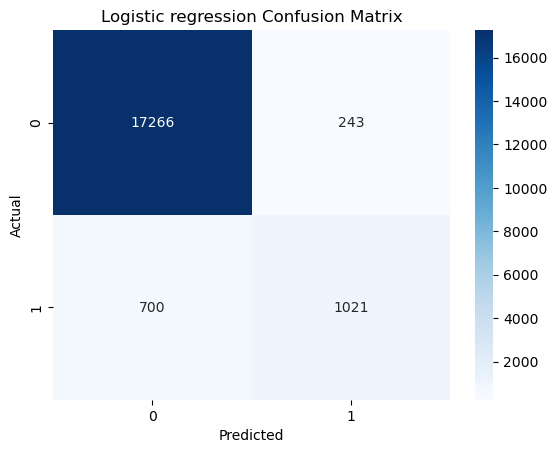

In [54]:
## To create a confusion test
lcm = confusion_matrix(y_test, ly_pred)

## Visualise the confujsion matrix
sns.heatmap(lcm,annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression Confusion Matrix')
plt.show()

In [55]:
## Model Building
#Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Random forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random forest
Accuracy: 0.9681747269890796
Precision: 0.9411296738265712
Recall: 0.6873910517141197
F1-score: 0.7944929482874412
AUC-ROC: 0.8415823269307934


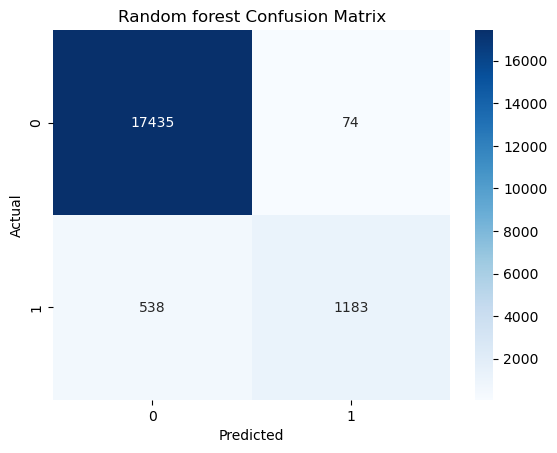

In [56]:
## To create a confusion test
rcm = confusion_matrix(y_test, rfy_pred)

## Visualise the confusion matrix
sns.heatmap(rcm,annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random forest Confusion Matrix')
plt.show()

In [57]:
## Model Building
# Initialize and train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

XGBoost
Accuracy: 0.9699427977119085
Precision: 0.9561053471667997
Recall: 0.6961069145845439
F1-score: 0.8056489576328177
AUC-ROC: 0.8464828364686955


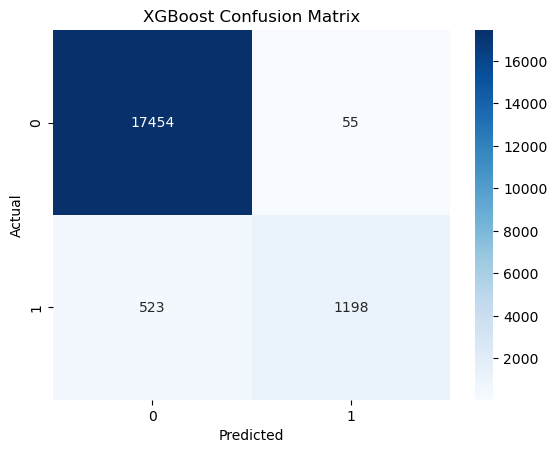

In [58]:
## To create a confusion test
xcm = confusion_matrix(y_test, y_pred)

## Visualise the confusion matrix
sns.heatmap(xcm,annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

In [59]:
## Model Building
# Initialize and train the Decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
dty_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Decision tree")
print("Accuracy:", accuracy_score(y_test, dty_pred))
print("Precision:", precision_score(y_test, dty_pred))
print("Recall:", recall_score(y_test, dty_pred))
print("F1-score:", f1_score(y_test, dty_pred))
print("AUC-ROC:", roc_auc_score(y_test, dty_pred))


Decision tree
Accuracy: 0.9473738949557983
Precision: 0.696398891966759
Recall: 0.7303893085415456
F1-score: 0.7129892229154849
AUC-ROC: 0.849545559519502


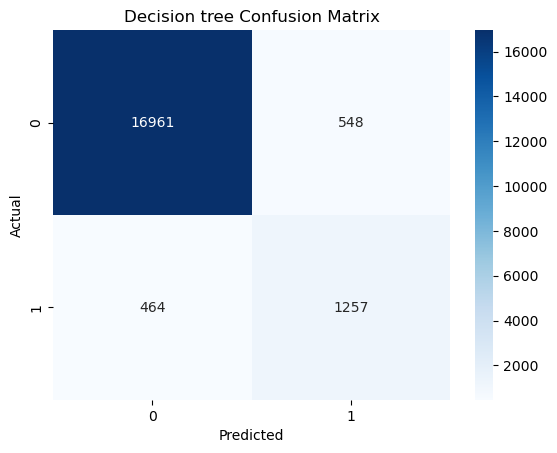

In [60]:
## To create a confusion test
dtm = confusion_matrix(y_test, dty_pred)

## Visualise the confusion matrix
sns.heatmap(dtm,annot=True, cmap="Blues", fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision tree Confusion Matrix')
plt.show()

In [61]:
# Machine Learning Algorithm will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [62]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionT

In [63]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [64]:
acc_list

{'XGB Classifier': ['96.99%'],
 'Random Forest': ['96.81%'],
 'K-Nearest Neighbours': ['95.15%'],
 'SGD Classifier': ['93.18%'],
 'SVC': ['94.61%'],
 'Naive Bayes': ['89.77%'],
 'Decision tree': ['94.74%'],
 'Logistic Regression': ['95.1%']}

In [65]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,96.99%,96.81%,95.15%,93.18%,94.61%,89.77%,94.74%,95.1%


In [66]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,95.61%,93.96%,86.36%,59.18%,100.0%,44.94%,69.64%,80.78%


In [67]:
print("ROC score")
s3 = pd.DataFrame(roc_list)
s3.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,84.65%,84.15%,76.8%,85.8%,69.87%,77.93%,84.95%,78.97%


In [68]:
print("recall")
s4 = pd.DataFrame(recall_list)
s4.head()

recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,69.61%,68.74%,54.45%,76.82%,39.74%,63.51%,73.04%,59.33%


## Model Evaluation and Recommendation

In [69]:
## 5. MODEL EVALUATION:
## Analyze the results of your trained models
##What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?
# In conclusion, on the model to choose

# XGB Classifier is preferred in terms of accuracy with 96.99%
# XGB Classifier is preferred in precision with 95.61%
# Decision tree is preferred in terms of ROC score with 84.95%, though XGB Classifier has 84.65%, which is a slight difference of 0.30%
# Decision tree is preferred in terms of recall score with 73.04%


In [70]:
import joblib  # ✅ Make sure this is included

# Save model
joblib.dump(model, 'Diabetes_model.joblib')

# Load model later
loaded_model = joblib.load('Diabetes_model.joblib')

In [73]:
print(loaded_model.predict(X_test))

[0 0 1 ... 0 0 0]
